In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import get_best_params_overall

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
history_XGBoost = pd.read_csv('../history/history_dataset_XGBoost.csv')
history_DecisionTree = pd.read_csv('../history/history_dataset_DecisionTree.csv')
history_RandomForest = pd.read_csv('../history/history_dataset_RandomForest.csv')
history_bo_XGBoost = pd.read_csv('../history_bayes/history_bayes_all_XGBoost.csv')
history_bo_DecisionTree = pd.read_csv('../history_bayes/history_bayes_all_DecisionTree.csv')
history_bo_RandomForest = pd.read_csv('../history_bayes/history_bayes_all_RandomForest.csv')

history_RS = [history_XGBoost, history_DecisionTree, history_RandomForest]
history_BS = [history_bo_XGBoost, history_bo_DecisionTree, history_bo_RandomForest]

In [3]:
history_DecisionTree.head()

,dataset,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.050049,0.003999,0.016370,0.010072,gini,20,29,16,"{'model__criterion': 'gini', 'model__max_depth...",0.870541,0.867928,0.854435,0.830996,0.861438,0.857067,0.014179,357
1,0,0.050087,0.006675,0.017093,0.005025,gini,8,21,40,"{'model__criterion': 'gini', 'model__max_depth...",0.841508,0.879359,0.852184,0.855587,0.855214,0.856770,0.012394,371
2,0,0.055101,0.002849,0.011767,0.001511,entropy,19,23,12,"{'model__criterion': 'entropy', 'model__max_de...",0.844455,0.873494,0.836228,0.868596,0.862720,0.857098,0.014339,355
3,0,0.067257,0.012932,0.013735,0.007291,gini,24,53,37,"{'model__criterion': 'gini', 'model__max_depth...",0.876480,0.869898,0.845854,0.834940,0.836402,0.852715,0.017258,542
4,0,0.058214,0.007315,0.016896,0.006019,entropy,24,3,23,"{'model__criterion': 'entropy', 'model__max_de...",0.734143,0.837399,0.809391,0.782806,0.795051,0.791758,0.034072,902


In [4]:
def get_tunabilies_per_dataset_for_every_param_set(history_df:pd.DataFrame):
    default_params, default_score = get_best_params_overall(history_df)
    datasets = history_df['dataset'].unique()
    default_df = pd.DataFrame({
        'dataset': datasets,
        'params_str': np.repeat(default_params,datasets.size),
        'mean_test_score':np.repeat(default_score, datasets.size),
        'is_default':np.repeat(True, datasets.size)
    })

    history_df['params_str'] = history_df['params'].apply(lambda x: str(x))
    score_per_param = history_df.groupby(['dataset', 'params_str'])['mean_test_score'].mean().reset_index() #if the same params' set was sampled twice

    score_per_param['is_default'] = False
    score_per_param = pd.concat([score_per_param, default_df], ignore_index=True)

    score_per_param['abs_tunability'] = score_per_param['mean_test_score'] - default_score
    score_per_param['dataset_str'] = score_per_param['dataset'].apply(lambda x: str(x))
        
    return score_per_param

In [17]:
def plot_tunabilities(tunabilites):
    sns.violinplot(tunabilites,
              x='dataset_str',
              y='abs_tunability',
              alpha = 0.8,
              color="gray")
    sns.stripplot(tunabilites,
                x='dataset_str',
                y='abs_tunability',
                hue='is_default',
                legend=False,
                jitter=False, 
                zorder = 1)

    plt.xlabel('Dataset')
    plt.ylabel('Absolute tunability')
    plt.show()

# Random Search

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,"{'model__alpha': 0.00010075508037587195, 'mode...",0.908918,False,-0.030728,0
1,0,"{'model__alpha': 0.00010090061869151566, 'mode...",0.886711,False,-0.052935,0
2,0,"{'model__alpha': 0.00010602559030165456, 'mode...",0.909047,False,-0.030599,0
3,0,"{'model__alpha': 0.00010634836177402131, 'mode...",0.910577,False,-0.029069,0
4,0,"{'model__alpha': 0.00010680532522712329, 'mode...",0.907139,False,-0.032507,0
...,...,...,...,...,...,...
3999,3,"{'model__alpha': 9.752237705013078, 'model__et...",0.845517,False,-0.094129,3
4000,0,"{'model__alpha': 1.2481751282245537, 'model__e...",0.939646,True,0.000000,0
4001,1,"{'model__alpha': 1.2481751282245537, 'model__e...",0.939646,True,0.000000,1
4002,2,"{'model__alpha': 1.2481751282245537, 'model__e...",0.939646,True,0.000000,2


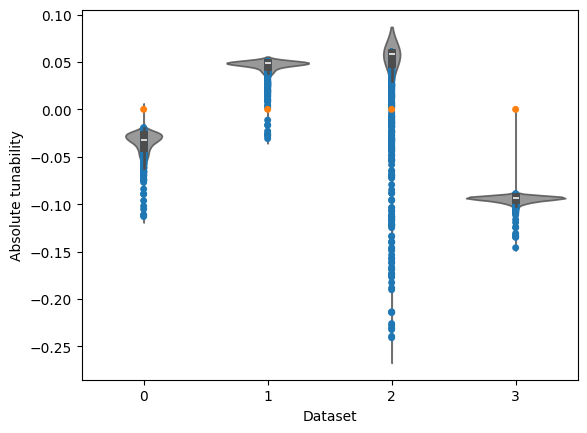

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,"{'model__criterion': 'entropy', 'model__max_de...",0.720456,False,-0.183152,0
1,0,"{'model__criterion': 'entropy', 'model__max_de...",0.720456,False,-0.183152,0
2,0,"{'model__criterion': 'entropy', 'model__max_de...",0.720456,False,-0.183152,0
3,0,"{'model__criterion': 'entropy', 'model__max_de...",0.720456,False,-0.183152,0
4,0,"{'model__criterion': 'entropy', 'model__max_de...",0.720456,False,-0.183152,0
...,...,...,...,...,...,...
3991,3,"{'model__criterion': 'gini', 'model__max_depth...",0.777460,False,-0.126147,3
3992,0,"{'model__criterion': 'gini', 'model__max_depth...",0.903608,True,0.000000,0
3993,1,"{'model__criterion': 'gini', 'model__max_depth...",0.903608,True,0.000000,1
3994,2,"{'model__criterion': 'gini', 'model__max_depth...",0.903608,True,0.000000,2


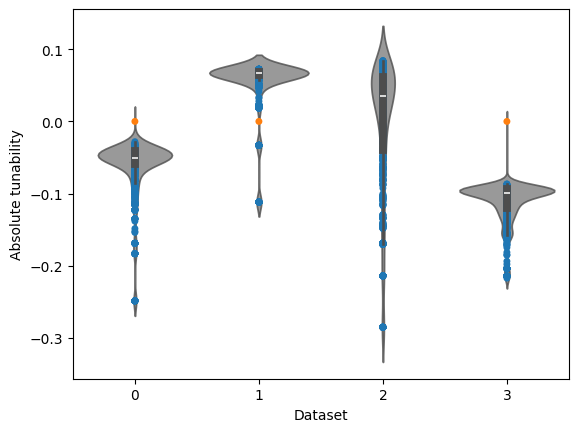

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,{'model__max_features': 0.00033350578798328593...,0.807710,False,-0.132633,0
1,0,"{'model__max_features': 0.000443780994426447, ...",0.821638,False,-0.118705,0
2,0,"{'model__max_features': 0.0027118967034302564,...",0.819312,False,-0.121031,0
3,0,"{'model__max_features': 0.002882248784362927, ...",0.872078,False,-0.068265,0
4,0,"{'model__max_features': 0.0032192603860150774,...",0.888957,False,-0.051386,0
...,...,...,...,...,...,...
3999,3,"{'model__max_features': 0.9993535002123353, 'm...",0.836408,False,-0.103935,3
4000,0,"{'model__max_features': 0.49816568848070625, '...",0.940343,True,0.000000,0
4001,1,"{'model__max_features': 0.49816568848070625, '...",0.940343,True,0.000000,1
4002,2,"{'model__max_features': 0.49816568848070625, '...",0.940343,True,0.000000,2


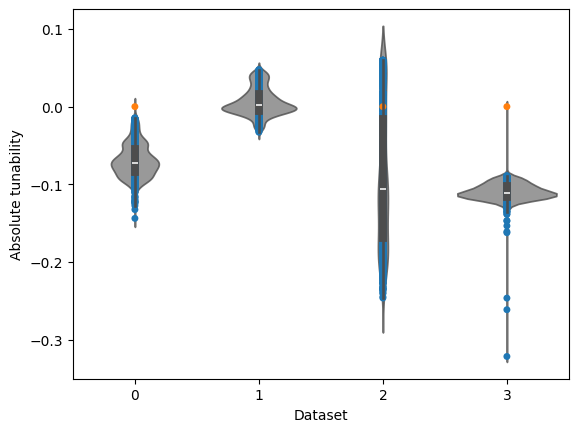

In [6]:
for h in history_RS:
    t = get_tunabilies_per_dataset_for_every_param_set(h)
    display(t)
    plot_tunabilities(t)

# Bayes Search

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,"OrderedDict([('model__alpha', 0.0001), ('model...",0.916100,False,-0.083896,0
1,0,"OrderedDict([('model__alpha', 0.0001), ('model...",0.917902,False,-0.082094,0
2,0,"OrderedDict([('model__alpha', 0.0001), ('model...",0.918977,False,-0.081019,0
3,0,"OrderedDict([('model__alpha', 0.0001), ('model...",0.917325,False,-0.082671,0
4,0,"OrderedDict([('model__alpha', 0.00010426811836...",0.914592,False,-0.085404,0
...,...,...,...,...,...,...
399,3,"OrderedDict([('model__alpha', 9.71540102166402...",0.845841,False,-0.154155,3
400,0,"OrderedDict([('model__alpha', 0.00093187786868...",0.999996,True,0.000000,0
401,1,"OrderedDict([('model__alpha', 0.00093187786868...",0.999996,True,0.000000,1
402,2,"OrderedDict([('model__alpha', 0.00093187786868...",0.999996,True,0.000000,2


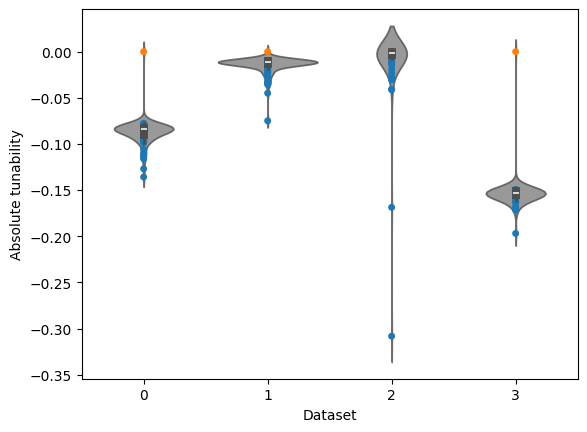

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.720456,False,-0.268290,0
1,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.720456,False,-0.268290,0
2,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.868733,False,-0.120012,0
3,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.867510,False,-0.121236,0
4,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.862817,False,-0.125928,0
...,...,...,...,...,...,...
399,3,"OrderedDict([('model__criterion', 'gini'), ('m...",0.812698,False,-0.176047,3
400,0,"OrderedDict([('model__criterion', 'entropy'), ...",0.988745,True,0.000000,0
401,1,"OrderedDict([('model__criterion', 'entropy'), ...",0.988745,True,0.000000,1
402,2,"OrderedDict([('model__criterion', 'entropy'), ...",0.988745,True,0.000000,2


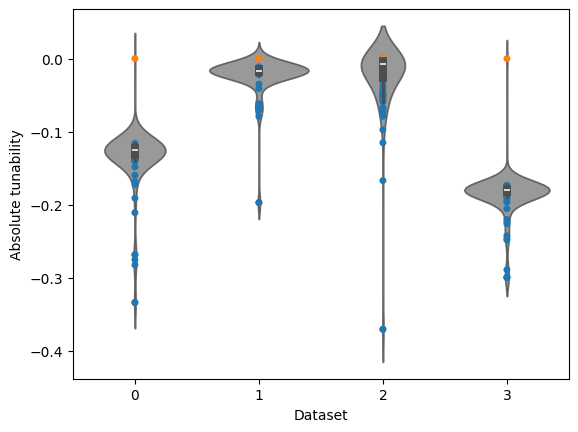

,dataset,params_str,mean_test_score,is_default,abs_tunability,dataset_str
0,0,"OrderedDict([('model__max_features', 0.0036156...",0.823217,False,-0.176783,0
1,0,"OrderedDict([('model__max_features', 0.0036313...",0.830104,False,-0.169896,0
2,0,"OrderedDict([('model__max_features', 0.0049132...",0.843241,False,-0.156759,0
3,0,"OrderedDict([('model__max_features', 0.0839857...",0.916991,False,-0.083009,0
4,0,"OrderedDict([('model__max_features', 0.1261776...",0.921589,False,-0.078411,0
...,...,...,...,...,...,...
399,3,"OrderedDict([('model__max_features', 1e-06), (...",0.618122,False,-0.381878,3
400,0,"OrderedDict([('model__max_features', 0.0438444...",1.000000,True,0.000000,0
401,1,"OrderedDict([('model__max_features', 0.0438444...",1.000000,True,0.000000,1
402,2,"OrderedDict([('model__max_features', 0.0438444...",1.000000,True,0.000000,2


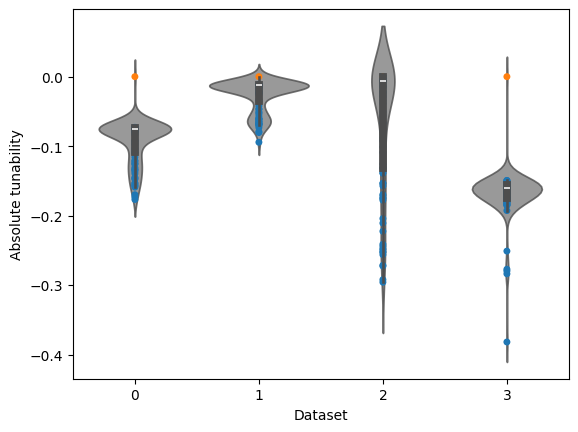

In [7]:
for h in history_BS:
    t = get_tunabilies_per_dataset_for_every_param_set(h)
    display(t)
    plot_tunabilities(t)

In [22]:
def plot_tunabilities(tunabilites, ax = None):
    if ax is None: 
        fig,ax = plt.plot()
    sns.violinplot(tunabilites,
              x='dataset_str',
              y='abs_tunability',
              alpha = 0.8,
              color="gray", ax=ax)
    sns.stripplot(tunabilites,
                x='dataset_str',
                y='abs_tunability',
                hue='is_default',
                legend=False,
                jitter=False, 
                zorder = 1, ax=ax)

    ax.set_xlabel('Dataset')
    ax.set_ylabel('Absolute tunability')

    return ax

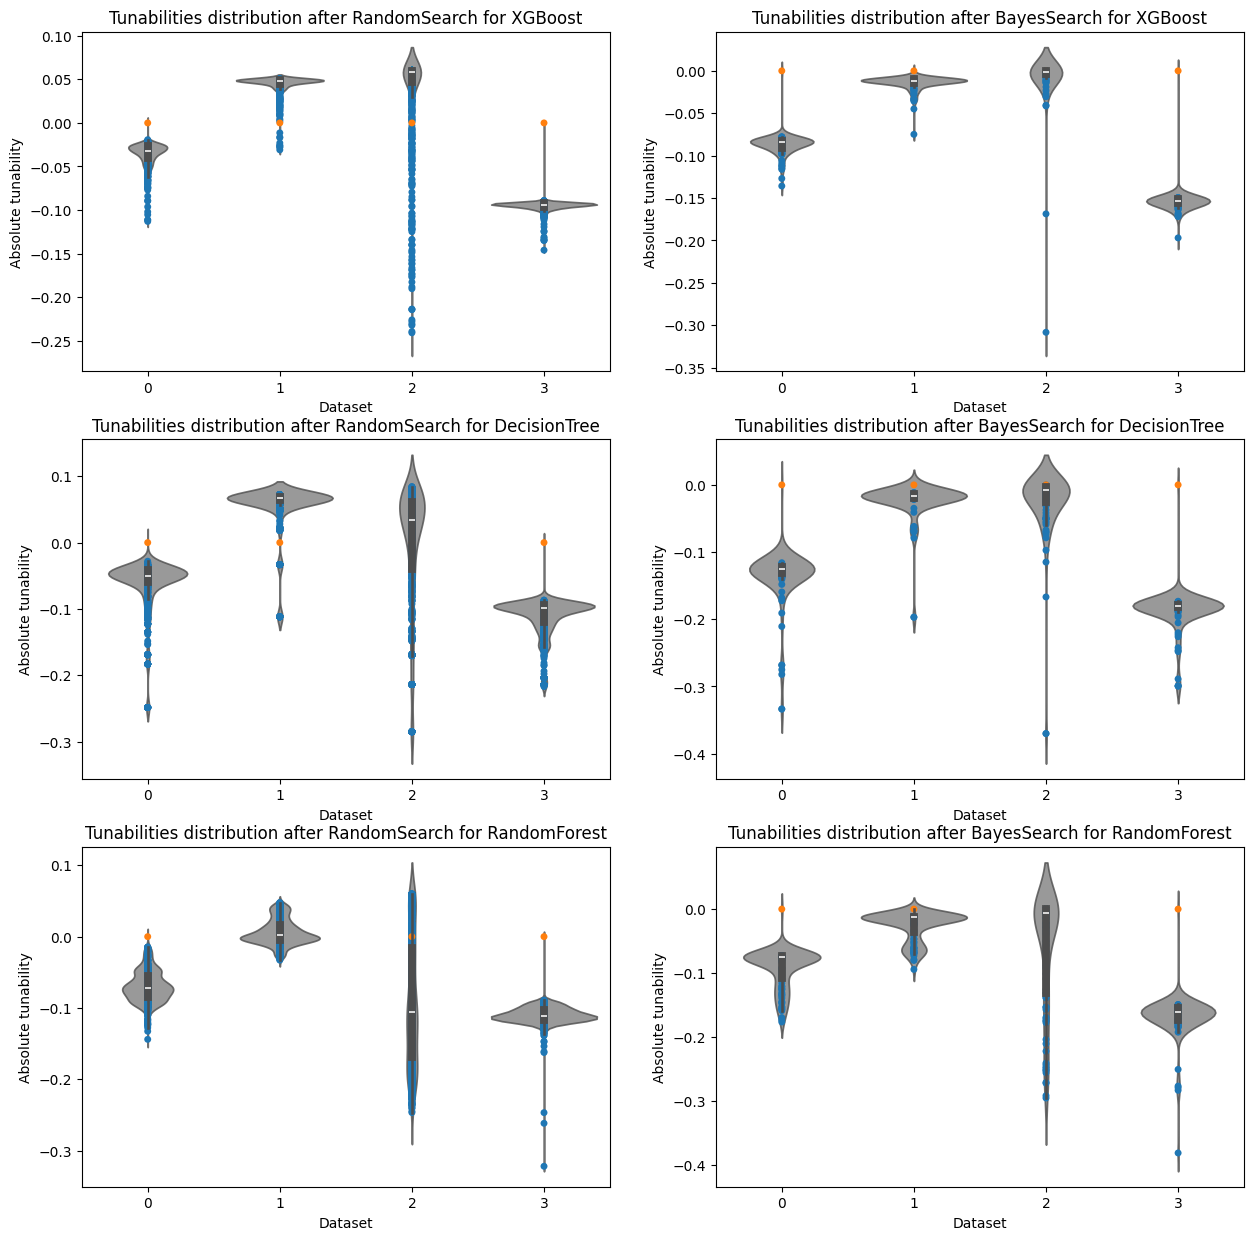

In [24]:
fig, axs = plt.subplots(len(history_RS), 2, figsize = [15,15])

names = ["XGBoost","DecisionTree", "RandomForest"]

for i,(rs, bs) in enumerate(zip(history_RS, history_BS)):
    trs = get_tunabilies_per_dataset_for_every_param_set(rs)
    tbs = get_tunabilies_per_dataset_for_every_param_set(bs)
    plot_tunabilities(trs, axs[i,0])
    plot_tunabilities(tbs, axs[i,1])

    axs[i,0].set_title(f"Tunabilities distribution after RandomSearch for {names[i]}")
    axs[i,1].set_title(f"Tunabilities distribution after BayesSearch for {names[i]}")

plt.show()
